In [151]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('./data/novels/_metadata.tsv', sep='\t')
pd.set_option('display.max_columns', None)
df.head()

# df['DBNLgenre'].value_counts()

,DBNLti_id,DBNLpers_id,YearFirstPublished,YearEditionPublished,Edition,Woman,Born,Died,AuthorOrigin,DBNLgeb_land_code,DBNLgenre,DBNLsubgenre,Author,Title,Filename,ti_id_set,WPAuthor,AuthorInCanon2002,TitleInCanon2002,InBasisbibliotheek2008,AuthorDBRDMatches,AuthorNLWikipedia2019Matches,DBNLSecRefsAuthor,DBNLSecRefsTitle,holding,lending,GNTpages
0,kist001leve01,kist001,1800,1800,1ste druk,0,1758.0,1841.0,Woerden,NaN,proza,roman,Willem Kist,"Het leven, gevoelens en zonderlinge reize van ...",kist001leve01_01.xml,kist001leve01,NaN,0,0,0,0,1,19,1,0,0,4
1,wolf016gesc01,deke001,1802,1802,1ste druk,1,1741.0,1804.0,Amstelveen,NaN,proza,roman,Aagje Deken,Geschrift eener bejaarde vrouw,wolf016gesc01_01.xml,wolf016gesc01,Aagje Deken,1,0,0,1,21,131,6,0,0,0
2,stre001char01,stre001,1804,1804,1ste druk,1,1760.0,1828.0,Amsterdam,NaN,proza,briefroman,Naatje van Streek-Brinkman,"Charakters en lotgevallen van Adelson, Héloïse...",stre001char01_01.xml,stre001char01,NaN,0,0,0,0,0,13,0,0,0,0
3,daal002will01,daal002,1805,1805,1ste druk,0,1758.0,1818.0,Amsterdam,NaN,proza,roman,Bruno Daalberg,Willem Hups. Eene anecdote uit de XVII eeuw; o...,daal002will01_01.xml,daal002will01,Petrus de Wacker van Zon,0,0,0,0,0,19,2,0,0,2
4,loos005hist01,loos005,1806,1806,1ste druk,0,1761.0,1818.0,Den Hoorn (Texel),NaN,proza,briefroman,Adriaan Loosjes,Historie van Mejuffrouw Susanna Bronkhorst. De...,loos005hist01_01.xml,loos005hist01,Adriaan Loosjes,0,0,0,0,6,68,3,0,0,4


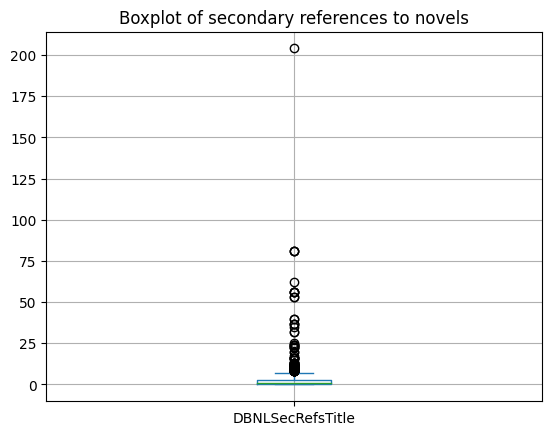

count    1346.000000
mean        2.827637
std         8.771872
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       204.000000
Name: DBNLSecRefsTitle, dtype: float64

In [164]:
# boxplot of the canonicity scores
df.plot.box(column='DBNLSecRefsTitle', title='Boxplot of secondary references to novels', grid=True)
plt.show()

df['DBNLSecRefsTitle'].describe()

In [154]:
# select novels in correct timespan
START_YEAR, END_YEAR = '1850', '1950'
OPENBOEK_NOVELS = ['coup002elin01', 'mult001maxh14'] # only these two also occur in the DBNL dataset

# select novels from the (inclusive) range of year, make sure that they are not
# in the train set, and make sure that their genre is proza

df_filtered = df.query(f'(YearFirstPublished >= {START_YEAR} and YearFirstPublished < {END_YEAR} and DBNLgenre == "proza") and DBNLti_id not in {OPENBOEK_NOVELS}')

df_filtered

,DBNLti_id,DBNLpers_id,YearFirstPublished,YearEditionPublished,Edition,Woman,Born,Died,AuthorOrigin,DBNLgeb_land_code,DBNLgenre,DBNLsubgenre,Author,Title,Filename,ti_id_set,WPAuthor,AuthorInCanon2002,TitleInCanon2002,InBasisbibliotheek2008,AuthorDBRDMatches,AuthorNLWikipedia2019Matches,DBNLSecRefsAuthor,DBNLSecRefsTitle,holding,lending,GNTpages
84,bosb002alkm02,bosb002,1850,1860,3de druk,1,1812.0,1886.0,Alkmaar,NaN,proza,novelle(n),A.L.G. Bosboom-Toussaint,De Alkmaarsche wees en eenige andere novellen,bosb002alkm02_01.xml,"bosb002alkm02,bosb002alkm01,bosb002graa01,bosb...",Geertruida Bosboom-Toussaint,0,0,0,0,6,127,7,0,0,0
85,cons001baes01,cons001,1850,1850,1ste druk,0,1812.0,1883.0,Antwerpen,NaN,proza,roman,Hendrik Conscience,Baes Gansendonck,cons001baes01_01.xml,cons001baes01,Hendrik Conscience,0,0,0,7,93,230,1,0,0,1
86,cons001lote01,cons001,1850,1850,1ste druk,0,1812.0,1883.0,Antwerpen,NaN,proza,roman,Hendrik Conscience,De loteling,cons001lote01_01.xml,cons001lote01,Hendrik Conscience,0,0,0,7,93,230,6,0,0,1
88,lenn006eliz01,lenn006,1850,1850,1ste druk,0,1802.0,1868.0,Amsterdam,NaN,proza,historische roman,Jacob van Lennep,Elizabeth Musch (3 delen),lenn006eliz01_01.xml,lenn006eliz01,Jacob van Lennep,1,0,0,3,77,198,1,0,0,19
90,snie001arme01,snie001,1851,1851,1ste druk,0,1825.0,1904.0,Bladel,NaN,proza,roman,August Snieders,De arme schoolmeester,snie001arme01_01.xml,snie001arme01,August Snieders,0,0,0,0,9,31,1,1,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,lenn001twee01,lenn001,1949,1949,1ste druk,1,1899.0,1972.0,Hattem,NaN,proza,novelle(n),Clare Lennart,Twee negerpopjes,lenn001twee01_01.xml,lenn001twee01,Clare Lennart,0,0,0,0,1,14,0,0,0,1
1129,nico002broc01,nico002,1949,1949,1ste druk,0,1902.0,1976.0,Roermond,NaN,proza,roman,Edmond Nicolas,Brocaat en boerenbont. Schering en inslag van ...,nico002broc01_01.xml,nico002broc01,Edmond Nicolas,0,0,0,0,4,4,0,0,0,0
1131,scha033witt01,scha033,1949,1949,1ste druk,1,1895.0,1984.0,Amsterdam,NaN,proza,roman,Jeanne van Schaik-Willing,Witte veren,scha033witt01_01.xml,scha033witt01,NaN,0,0,0,1,1,16,0,0,0,1
1132,schr014klei02,schr014,1949,1949,1ste druk,0,1893.0,1966.0,Sittard,NaN,proza,roman,Jacques Schreurs,Kleine vertellingen,schr014klei02_01.xml,schr014klei02,Jacques Schreurs,0,0,0,0,12,18,0,0,0,0


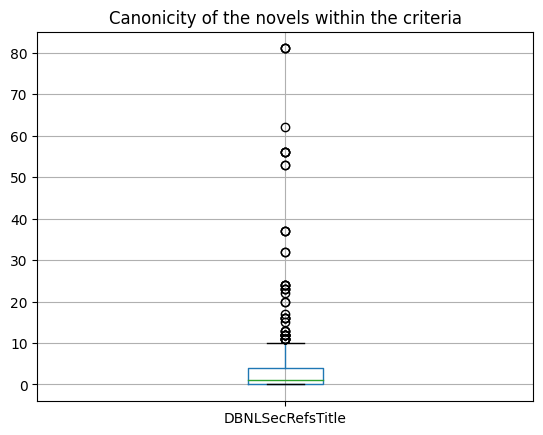

count    807.000000
mean       3.599752
std        8.206525
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       81.000000
Name: DBNLSecRefsTitle, dtype: float64

In [155]:
# plot division of novels that fulfill requirements
boxplot = df_filtered.boxplot(column=['DBNLSecRefsTitle'], labels=['Canonicity Score'])
boxplot.set_title('Canonicity of the novels within the criteria')
plt.show()

df_filtered['DBNLSecRefsTitle'].describe()

In [156]:
# select canonical novels with DBNLSecRefsTitle larger than 10
df_canonical_small = df_filtered.query(f'DBNLSecRefsTitle >= {10}')
df_canonical_small = df_canonical_small.sort_values(['DBNLSecRefsTitle'])
df_canonical_small = df_canonical_small.drop_duplicates(['Author'], keep='first')

df_canonical_small # has length of 29 novels

,DBNLti_id,DBNLpers_id,YearFirstPublished,YearEditionPublished,Edition,Woman,Born,Died,AuthorOrigin,DBNLgeb_land_code,DBNLgenre,DBNLsubgenre,Author,Title,Filename,ti_id_set,WPAuthor,AuthorInCanon2002,TitleInCanon2002,InBasisbibliotheek2008,AuthorDBRDMatches,AuthorNLWikipedia2019Matches,DBNLSecRefsAuthor,DBNLSecRefsTitle,holding,lending,GNTpages
1109,vest002vuur01,vest002,1947,1947,1ste druk,0,1898.0,1971.0,Harlingen,NaN,proza,roman,Simon Vestdijk,De vuuraanbidders,vest002vuur01_01.xml,vest002vuur01,Simon Vestdijk,1,1,1,18,100,372,10,0,0,18
625,looy001jaap01,looy001,1917,1917,1ste druk,0,1855.0,1930.0,Haarlem,NaN,proza,"non-fictie/autobiografie-memoires,roman",Jac. van Looy,Jaapje,looy001jaap01_01.xml,looy001jaap01,Jacobus van Looy,0,0,0,0,16,132,10,6,11,18
871,szek002koel01,szek002,1931,1932,1ste druk,1,1899.0,1958.0,Soerabaja,indon01,proza,roman,M.H. Székely-Lulofs,Koelie,szek002koel01_01.xml,szek002koel01,Madelon Székely-Lulofs,0,0,0,2,6,38,10,0,0,0
461,boud007kind01,boud007,1905,1905,1ste druk,1,1875.0,1966.0,Amsterdam,NaN,proza,novelle(n),Ina Boudier-Bakker,Kinderen,boud007kind01_01.xml,boud007kind01,Ina Boudier-Bakker,1,0,0,0,15,53,10,0,0,1
901,last001part01,last001,1933,1933,1ste druk,0,1898.0,1972.0,Den Haag,NaN,proza,roman,Jef Last,Partij remise,last001part01_01.xml,last001part01,Jef Last,0,0,0,0,22,61,10,0,0,15
614,such003stil01,such003,1916,1916,1ste druk,0,1878.0,1949.0,Amsterdam,NaN,proza,roman,Nico van Suchtelen,De stille lach,such003stil01_01.xml,such003stil01,Nico van Suchtelen,0,0,0,0,10,45,10,0,0,0
955,bord001rood01,bord001,1936,1936,1ste druk,0,1884.0,1965.0,Amsterdam,NaN,proza,roman,F. Bordewijk,Rood paleis,bord001rood01_01.xml,bord001rood01,Ferdinand Bordewijk,1,0,0,4,43,125,10,0,0,21
302,eede003joha02,eede003,1892,1979,2de druk,0,1860.0,1932.0,Haarlem,NaN,proza,roman,Frederik van Eeden,Johannes Viator,eede003joha02_01.xml,"eede003joha02,eede003joha01",Frederik van Eeden,1,0,0,6,87,301,10,0,0,46
220,waze001vlaa01,waze001,1879,1881,2de druk,0,1840.0,1906.0,"Eksaarde, Waasland",NaN,proza,roman,Wazenaar,Een Vlaamsche jongen,waze001vlaa01_01.xml,"waze001vlaa01,waze001vlaa02",Amand de Vos,0,0,0,0,0,19,10,0,0,0
352,coup002meta01,coup002,1897,1897,1ste druk,0,1863.0,1923.0,Den Haag,NaN,proza,roman,Louis Couperus,Metamorfoze,coup002meta01_01.xml,coup002meta01,Louis Couperus,1,0,0,28,197,372,11,17,50,2


In [157]:
# select canonical novels with DBNLSecRefsTitle larger than 3 and remove outliers
df_canonical_large = df_filtered.query(f'DBNLSecRefsTitle >= {3}')
#remove outliers
description = df_canonical_large['DBNLSecRefsTitle'].describe()
outliers_min = description['25%'] - description['std']
outliers_max = description['75%'] + description['std']
df_canonical_large = df_canonical_large.query(f'DBNLSecRefsTitle > {outliers_min} and DBNLSecRefsTitle < {outliers_max}')

df_canonical_large = df_canonical_large.sort_values(['DBNLSecRefsTitle'])
df_canonical_large = df_canonical_large.drop_duplicates(['Author'], keep='first')

df_canonical_large['DBNLSecRefsTitle'].describe()


count    122.000000
mean       4.311475
std        1.924535
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       13.000000
Name: DBNLSecRefsTitle, dtype: float64

In [158]:
# select non-canonical novels (same ammount as canonical df)
df_non_canonical = df_filtered.query(f'DBNLSecRefsTitle == {0}')

# make sure random novels of authors are dropped, not all but their first
df_non_canonical = df_non_canonical.sample(frac=1, random_state=123) 
df_non_canonical = df_non_canonical.drop_duplicates(['Author'], keep='first')

df_non_canonical_small = df_non_canonical.sample(len(df_canonical_small), random_state=123)

df_non_canonical_small # also has 29 novels

,DBNLti_id,DBNLpers_id,YearFirstPublished,YearEditionPublished,Edition,Woman,Born,Died,AuthorOrigin,DBNLgeb_land_code,DBNLgenre,DBNLsubgenre,Author,Title,Filename,ti_id_set,WPAuthor,AuthorInCanon2002,TitleInCanon2002,InBasisbibliotheek2008,AuthorDBRDMatches,AuthorNLWikipedia2019Matches,DBNLSecRefsAuthor,DBNLSecRefsTitle,holding,lending,GNTpages
831,goud005jank01,goud005,1930,1930,1ste druk,0,1884.0,1954.0,Kampen,NaN,proza,roman,Sam Goudsmit,Jankef's oude sleutel,goud005jank01_01.xml,goud005jank01,Sam Goudsmit,0,0,0,0,1,13,0,0,0,5
321,verm043gehe01,verm043,1893,1893,1ste druk,0,1857.0,1944.0,Kortrijk,NaN,proza,roman,René Vermandere,Geheugenissen,verm043gehe01_01.xml,verm043gehe01,NaN,0,0,0,0,0,6,0,0,0,0
735,treg001ramp01,treg001,1924,1924,1ste druk,0,1844.0,1925.0,Maastricht,NaN,proza,historische roman,Arnaud de Trega,Ramp en misdaad. 1623-1638,treg001ramp01_01.xml,treg001ramp01,NaN,0,0,0,0,0,2,0,0,0,0
230,veer004malt01,veer004,1880,1880,1ste druk,0,1829.0,1890.0,Sommelsdijk,NaN,proza,roman,Hendrik de Veer,Malthusia,veer004malt01_01.xml,veer004malt01,Hendrik de Veer,0,0,0,0,0,22,0,0,0,0
1107,schr014kron02,schr014,1947,1947,1ste druk,0,1893.0,1966.0,Sittard,NaN,proza,roman,Jacques Schreurs,Kroniek eener parochie. Deel 2. De mensch en z...,schr014kron02_01.xml,schr014kron02,Jacques Schreurs,0,0,0,0,12,18,0,0,0,0
705,bore002karm01,bore002,1923,1923,1ste druk,0,1869.0,1933.0,Dordrecht,NaN,proza,roman,Henri Borel,Karma,bore002karm01_01.xml,bore002karm01,Henri Borel,0,0,0,0,15,48,0,0,0,13
167,cour006nico01,cour006,1868,1868,1ste druk,1,1811.0,1890.0,Oudegem,NaN,proza,roman,Johanna Desideria Courtmans-Berchmans,Nicolette. Lotgevallen eener vondeling,cour006nico01_01.xml,cour006nico01,Johanna Courtmans-Berchmans,0,0,0,0,2,29,0,0,0,2
795,holt075gehe01,holt075,1928,1928,1ste druk,0,1881.0,1948.0,Deventer,NaN,proza,"roman,detective",William Holt,De geheime kamer van het Cecil-hotel,holt075gehe01_01.xml,holt075gehe01,NaN,0,0,0,1,0,1,0,0,0,0
1123,dekk007were01,dekk007,1949,1949,1ste druk,0,1896.0,1962.0,Amsterdam,NaN,proza,novelle(n),Maurits Dekker,De wereld heeft geen wachtkamer,dekk007were01_01.xml,dekk007were01,Maurits Dekker,0,0,0,1,10,27,0,4,0,1
769,avan003doll01,avan003,1927,1927,1ste druk,0,NaN,NaN,NaN,NaN,proza,"roman,detective",T. Avany,Dolly de danseres,avan003doll01_01.xml,avan003doll01,NaN,0,0,0,0,0,0,0,0,0,0


In [166]:
# select random non-canonical novels to create a selection the same size as df_canonical_large
df_non_canonical_large = df_non_canonical.sample(len(df_canonical_large), random_state=123)

df_non_canonical_large # has 122 novels

,DBNLti_id,DBNLpers_id,YearFirstPublished,YearEditionPublished,Edition,Woman,Born,Died,AuthorOrigin,DBNLgeb_land_code,DBNLgenre,DBNLsubgenre,Author,Title,Filename,ti_id_set,WPAuthor,AuthorInCanon2002,TitleInCanon2002,InBasisbibliotheek2008,AuthorDBRDMatches,AuthorNLWikipedia2019Matches,DBNLSecRefsAuthor,DBNLSecRefsTitle,holding,lending,GNTpages
831,goud005jank01,goud005,1930,1930,1ste druk,0,1884.0,1954.0,Kampen,NaN,proza,roman,Sam Goudsmit,Jankef's oude sleutel,goud005jank01_01.xml,goud005jank01,Sam Goudsmit,0,0,0,0,1,13,0,0,0,5
321,verm043gehe01,verm043,1893,1893,1ste druk,0,1857.0,1944.0,Kortrijk,NaN,proza,roman,René Vermandere,Geheugenissen,verm043gehe01_01.xml,verm043gehe01,NaN,0,0,0,0,0,6,0,0,0,0
735,treg001ramp01,treg001,1924,1924,1ste druk,0,1844.0,1925.0,Maastricht,NaN,proza,historische roman,Arnaud de Trega,Ramp en misdaad. 1623-1638,treg001ramp01_01.xml,treg001ramp01,NaN,0,0,0,0,0,2,0,0,0,0
230,veer004malt01,veer004,1880,1880,1ste druk,0,1829.0,1890.0,Sommelsdijk,NaN,proza,roman,Hendrik de Veer,Malthusia,veer004malt01_01.xml,veer004malt01,Hendrik de Veer,0,0,0,0,0,22,0,0,0,0
1107,schr014kron02,schr014,1947,1947,1ste druk,0,1893.0,1966.0,Sittard,NaN,proza,roman,Jacques Schreurs,Kroniek eener parochie. Deel 2. De mensch en z...,schr014kron02_01.xml,schr014kron02,Jacques Schreurs,0,0,0,0,12,18,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,kort010mens01,kort010,1933,1933,1ste druk,0,1898.0,1993.0,Rotterdam,NaN,proza,roman,Pieter Korthuys,Menschen in malaise,kort010mens01_01.xml,kort010mens01,NaN,0,0,0,0,0,3,0,0,0,0
268,schi018kapi05,schi018,1888,1888,1ste druk,0,1823.0,1906.0,'s-Graveland,NaN,proza,roman,H.J. Schimmel,De kapitein van de lijfgarde. Deel 2,schi018kapi05_01.xml,schi018kapi05,Hendrik Jan Schimmel,0,0,0,0,6,67,0,0,0,1
508,oliv001quas02,oliv001,1907,1907,1ste druk,0,1886.0,1944.0,Amsterdam,NaN,proza,roman,E. d'Oliveira,Quasi-socialisten. Hollanders te Antwerpen. De...,oliv001quas02_01.xml,oliv001quas02,NaN,0,0,0,0,0,8,0,0,0,0
1093,bour001vier01,bour001,1947,1947,1ste druk,0,1908.0,1975.0,Renkum,NaN,proza,novelle(n),Louis de Bourbon,Vier onbekenden,bour001vier01_01.xml,bour001vier01,Louis de Bourbon,0,0,0,0,10,8,0,0,0,1


In [160]:
# create textfiles that contain the novels per canonicity

# for df, filename in zip([df_canonical_small, df_non_canonical_small], ['canonical', 'non_canonical']):
#     novels = [filename.split('.')[0] for filename in list(df['Filename'])]

#     with open(f'./data/novels/_{filename}_novels_small.txt', 'w', encoding='UTF-8') as outp:
#         outp.write('\n'.join(novels))

for df, filename in zip([df_canonical_large, df_non_canonical_large], ['canonical', 'non_canonical']):
    novels = [filename.split('.')[0] for filename in list(df['Filename'])]

    with open(f'./data/novels/_{filename}_novels_large.txt', 'w', encoding='UTF-8') as outp:
        outp.write('\n'.join(novels))
    

In [161]:
# move selected novels .gz files from one folder to another
import shutil

filenames = set(list(df_canonical_small['Filename']) + list(df_non_canonical_small['Filename']) + list(df_canonical_large['Filename']) + list(df_non_canonical_large['Filename']))
source_folder = '../DBNL_text/'
destination_folder = './data/novels/'

for filename in filenames:
    file_zipname = filename.split('.')[0] + '.txt.gz'
    shutil.copyfile(source_folder + file_zipname, destination_folder + file_zipname)